In [1]:
!pip install tqdm scipy

Path found:
[(8, 5), (7, 4), (7, 3), (6, 2), (5, 1), (4, 1), (3, 1), (2, 2), (1, 2), (0, 2), (0, 1), (0, 0)]
Number of operations: 53


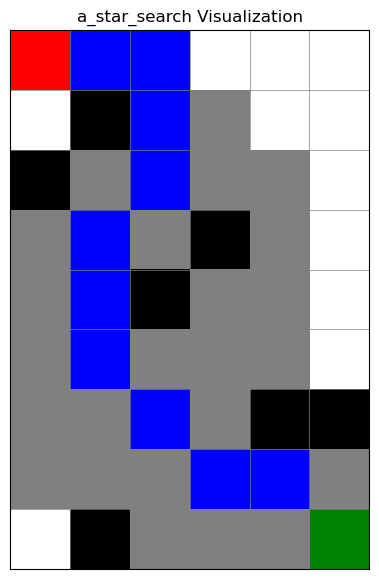

In [2]:
# Code from exercises week 5, modified A* algorithm, BoMR course

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from heapq import heappush, heappop # used if you want to use heap queue for priority queue (easier to implement) but not compulsory

def heuristic(a, b):
    # Implement the Euclidean distance heuristic
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def in_grid(grid, pos):
    return 0 <= pos[0] < grid.shape[0] and 0 <= pos[1] < grid.shape[1]

def is_obstacle(grid, pos):
    return not in_grid(grid, pos) or (grid[pos] == -1)
    

def a_star_search(map_grid, start, goal):
    # Initialize the open set as a priority queue and add the start node
    open_set = []
    heappush(open_set, (heuristic(start, goal), 0, start))  # (f_cost, g_cost, position)

    # Initialize the came_from dictionary
    came_from = {}
    # Initialize g_costs dictionary with default value of infinity and set g_costs[start] = 0
    g_costs = {start: 0}
    # Initialize the explored set
    explored = set()
    operation_count = 0

    while open_set:
        # Pop the node with the lowest f_cost from the open set
        current_f_cost, current_g_cost, current_pos = heappop(open_set)

        # Add the current node to the explored set
        explored.add(current_pos)

        # For directly reconstruct path
        if current_pos == goal:
            break
        
        up         = (current_pos[0] - 1, current_pos[1]    )
        down       = (current_pos[0] + 1, current_pos[1]    )  # Down
        left       = (current_pos[0]    , current_pos[1] - 1)  # Left
        right      = (current_pos[0]    , current_pos[1] + 1)  # Right
        up_left    = (current_pos[0] - 1, current_pos[1] - 1)  # Up Left
        down_right = (current_pos[0] + 1, current_pos[1] + 1)  # Down Right
        down_left  = (current_pos[0] + 1, current_pos[1] - 1)  # Down Left
        up_right   = (current_pos[0] - 1, current_pos[1] + 1)   # Up Right
        # Get the neighbors of the current node (up, down, left, right)
        neighbors = [up, down, left, right, up_left, down_right, down_left, up_right]
        
        
        if is_obstacle(map_grid, up) or is_obstacle(map_grid, left) :
                neighbors.remove(up_left)
        
        if is_obstacle(map_grid, up) or is_obstacle(map_grid, right):
                neighbors.remove(up_right)
                
        if is_obstacle(map_grid, down) or is_obstacle(map_grid, right):
                neighbors.remove(down_right)
                
        if is_obstacle(map_grid, down) or is_obstacle(map_grid, left):
                neighbors.remove(down_left)
            
                
        for neighbor in neighbors:
            # Check if neighbor is within bounds and not an obstacle
            if (in_grid(map_grid,neighbor)) and map_grid[neighbor[0], neighbor[1]] != -1 and neighbor not in explored:
                # Calculate tentative_g_cost
                tentative_g_cost = current_g_cost + heuristic(current_pos, neighbor)
                
                # If this path to neighbor is better than any previous one
                if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                    # Update came_from, g_costs, and f_cost
                    came_from[neighbor] = current_pos
                    g_costs[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristic(neighbor, goal)

                    # Add neighbor to open set
                    heappush(open_set, (f_cost, tentative_g_cost, neighbor))
                    operation_count += 1

    # Reconstruct path
    if current_pos == goal:
        path = []
        while current_pos in came_from:
            path.append(current_pos)
            current_pos = came_from[current_pos]
        path.append(start)
        return path[::-1], explored,operation_count
    else:
        # If we reach here, no path was found
        return None, explored,operation_count
    
    
##############################################
#do not modify this code
##############################################
def display_map(map_grid, path, start, goal, explored):
    cmap = ListedColormap(['white', 'black', 'blue', 'green', 'red', 'grey'])
    map_display = np.zeros_like(map_grid, dtype=object)

    # Assign colors based on the map grid values
    map_display[map_grid == -1] = 'black'  # Obstacles
    map_display[map_grid == 0] = 'white'   # Free space

    for position in explored:
        if map_display[tuple(position)] == 'white':
            map_display[tuple(position)] = 'grey'  # Explored cells

    # Visualize the path
    for position in path:
        if map_display[position[0], position[1]] in ['white', 'grey']:
            map_display[position[0], position[1]] = 'blue'  # Path

    map_display[start[0], start[1]] = 'green'  # Start
    map_display[goal[0], goal[1]] = 'red'      # Goal

    # Convert color names to numbers for plotting
    color_mapping = {'white': 0, 'black': 1, 'blue': 2, 'green': 3, 'red': 4, 'grey': 5, 'yellow': 6}
    map_numeric_display = np.vectorize(color_mapping.get)(map_display)
    fig, ax = plt.subplots(figsize=(6, 7))
    ax.imshow(map_numeric_display, cmap=cmap)
    ax.set_xticks(np.arange(-0.5, map_grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, map_grid.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title('a_star_search Visualization')
    plt.show()

map_height = 9
map_width = 6
Map = np.zeros((map_height, map_width))


#Map[0, :] = -1; Map[map_height - 1, :] = -1; Map[:, 0] = -1; Map[:, map_width - 1] = -1


Map[8, 1] = -1; Map[6, 4:6] = -1; Map[4, 2:3] = -1; Map[3, 3] = -1; Map[1, 1] = -1; Map[2, 0] = -1#Map[6,4] = -1; Map[7,4] = -1# obstacle
SearchStart =  (8, 5)
SearchGoal  =  (0, 0)

path, explored, operation_count = a_star_search(Map, SearchStart, SearchGoal)

# Display the result
if path:
    print("Path found:")
    print(path)
    print(f"Number of operations: {operation_count}")
    display_map(Map, path, SearchStart, SearchGoal, explored)
else:
    print("No path found.")


In [12]:
directions = [
    'N',   # North
    'NE',  # Northeast
    'E',   # East
    'SE',  # Southeast
    'S',   # South
    'SW',  # Southwest
    'W',   # West
    'NW'  # Northwest
]

orientation = 0 # Suppose Thymio is initially pointing North

def step_to_direction(step):
    if step[0] == 1:
        if step[1] == 1:
            return 3
        
        if step[1] == -1:
            return 5
        
        return 4
    
    if step[0] == -1:
        if step[1] == 1:
            return 1
        
        if step[1] == -1:
            return 7
        
        return 0
    
    if step[1] == 1:
        return 2
    
    return 6

path_directions = []
for i in range(len(path)-1):
    step = (path[i+1][0] - path[i][0], path[i+1][1] - path[i][1])
    path_directions.append(step_to_direction(step))

for direction in path_directions:
    print(directions[direction])

NW
W
NW
NW
N
N
NE
N
N
W
W


In [4]:
orientation = 0
for direction in path_directions:
    rotation = direction - orientation
    if rotation > 4:
        rotation -= 8
    if rotation < -3:
        rotation += 8
    rotation_direction = np.sign(rotation)
    rotation = abs(rotation)
    orientation = direction
    print(rotation, rotation_direction)
    

1 -1
1 -1
1 1
0 0
1 1
0 0
1 1
1 -1
0 0
2 -1
0 0


In [5]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 608f09df-b044-4573-8414-efa666631e72

In [12]:
orientation = 0
def motors(left, right):
    # Function from exercises week 8, BoMR course
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

for direction in path_directions:
    rotation = direction - orientation
    if rotation > 4:
        rotation -= 8
    if rotation < -3:
        rotation += 8
    rotation_direction = np.sign(rotation)
    rotation = abs(rotation)
    diag_factor = 1 
    if not (direction % 2):
        diag_factor = np.sqrt(2)
        
    
    if rotation != 0:
        node.send_set_variables(motors(100*rotation_direction, -100*rotation_direction))
        await client.sleep(1.17 * rotation)
        orientation = direction
    node.send_set_variables(motors(100, 100))
    
    await client.sleep(1*diag_factor)
node.send_set_variables(motors(0, 0))


In [13]:
node.send_set_variables(motors(0, 0))

In [ ]:
# from exercises 8 BoMR

from threading import Timer

class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False


In [135]:
# from https://felipenmartins.github.io/Robotics-Simulation-Labs/Lab4/

import numpy as np

def get_pose_error(xd, yd, x, y, phi):
    """ Returns the position and orientation errors. 
        Orientation error is bounded between -pi and +pi radians.
    """
    # Position error:
    x_err = xd - x
    y_err = yd - y
    dist_err = np.sqrt(x_err**2 + y_err**2)

    # Orientation error
    phi_d = np.arctan2(y_err,x_err)
    phi_err = phi_d - phi

    # Limits the error to (-pi, pi):
    phi_err_correct = np.arctan2(np.sin(phi_err),np.cos(phi_err))

    return dist_err, phi_err_correct

In [136]:
# from https://felipenmartins.github.io/Robotics-Simulation-Labs/Lab4/
def pid_controller(e, e_prev, e_acc, delta_t, kp=1.0, kd=0, ki=0):
    """ PID algortithm: must be executed every delta_t seconds
    The error e must be calculated as: e = desired_value - actual_value
    e_prev contains the error calculated in the previous step.
    e_acc contains the integration (accumulation) term.
    """
    P = kp*e                      # Proportional term; kp is the proportional gain
    I = e_acc + ki*e*delta_t      # Intergral term; ki is the integral gain
    D = kd*(e - e_prev)/delta_t   # Derivative term; kd is the derivative gain

    output = P + I + D              # controller output

    # store values for the next iteration
    e_prev = e     # error value in the previous interation (to calculate the derivative term)
    e_acc = I      # accumulated error value (to calculate the integral term)

    return output, e_prev, e_acc

In [9]:
speed_constant = 0.033615 # cm.s^(-1)

def get_robot_speeds(right_motor, left_motor, wheel_radius, base_width, speed_constant = 1):
    
    right_motor_speed = right_motor * speed_constant
    left_motor_speed  =  left_motor * speed_constant
    
    forward_speed = (right_motor_speed + left_motor_speed) / 2
    angular_speed = (right_motor_speed - left_motor_speed) / base_width
    
    return forward_speed, angular_speed
    
    

In [139]:
base_width = 9.4   # cm
wheel_radius = 2.2 # cm

next_goal = 1
array_of_goals = path
array_of_directions = path_directions

x = path[0][1]     # initial x and y are the start position
y = path[0][0]

phi = -np.pi/2            # initial phi is 0, pointing north

x_goal = path[next_goal][1]
y_goal = path[next_goal][0]
phi_goal = path_directions[next_goal - 1] * 2*np.pi / 8 - np.pi/2

dist_err, phi_err = get_pose_error(x_goal, y_goal, x, y, phi)
dist_err *= 14

In [140]:
# The values below are initialized to test the function. 
# When implementing this, you must update e_prev and e_acc properly at every step.
e = phi_err
e_prev = phi_err*0.9
e_acc = 0

delta_t = 0.1

# Controller gains:
kp = 0.5
kd = 0.00
ki = 0.00

# Obtain the desired angular speed:
w_d, e_prev_w, e_acc_w = pid_controller(e, e_prev, e_acc, delta_t, kp, kd, ki)
print(f'Desired angular speed w_d = {w_d} rad/s.')
print(f'Previous error = {e_prev_w} rad.')
print(f'Accumulated error = {e_acc_w}.')

Desired angular speed w_d = -0.39269908169872414 rad/s.
Previous error = -0.7853981633974483 rad.
Accumulated error = 0.0.


In [141]:
def wheel_speed_commands(u_d, w_d, d, r):
    """Convert desired robot speeds to desired wheel speeds"""
    wr_d = float((2 * u_d - d * w_d) / (2 * r))
    wl_d = float((2 * u_d + d * w_d) / (2 * r))
    
    # If saturated, correct speeds to keep the original turning ratio
    #if np.abs(wl_d) > MAX_SPEED or np.abs(wr_d) > MAX_SPEED:
     #   speed_ratio = np.abs(wr_d)/np.abs(wl_d)
      #  if speed_ratio > 1:
       #     wr_d = np.sign(wr_d)*MAX_SPEED
        #    wl_d = np.sign(wl_d)*MAX_SPEED/speed_ratio
        #else:
         #   wl_d = np.sign(wl_d)*MAX_SPEED
          #  wr_d = np.sign(wr_d)*MAX_SPEED*speed_ratio
    return wl_d, wr_d

In [142]:
speed_constant = 0.033615
left_speed, right_speed = wheel_speed_commands(2, w_d, base_width, wheel_radius)
left_speed  *= wheel_radius / speed_constant
right_speed *= wheel_radius / speed_constant

In [143]:
print(left_speed, right_speed)

4.5906385844413675 114.40385792009529


In [144]:
x = 0
y = 0

In [151]:
base_width = 9.4   # cm
wheel_radius = 2.2 # cm
dt = 0.1
forward_speed = 2 # cm/s
angular_speed = 0

def control_loop():
    global dt, base_width, wheel_radius, x, y, forward_speed, angular_speed
    

In [175]:
# Constant forward speed
u_const = 4  # cm/s (adjust based on your robot's speed capabilities)

# Time step
delta_t = 0.5  # seconds

# Initial errors for PID
phi_err_prev = 0
phi_err_acc = 0

# Initial robot position and orientation
x, y = path[0][1], path[0][0]
phi = -np.pi/2  # Initial orientation, pointing north

# Start with the first goal
next_goal = 1
x_goal = path[next_goal][1]
y_goal = path[next_goal][0]
phi_goal = path_directions[next_goal - 1] * 2*np.pi / 8 - np.pi/2


In [176]:
def update_odometry(x, y, phi, wl, wr, d, r, delta_t):
    """ Update robot's position and orientation using odometry """
    forward_speed = (wr + wl) * r / 2
    angular_speed = (wl - wr) * r / d

    x += forward_speed * np.cos(phi) * delta_t/14
    y += forward_speed * np.sin(phi) * delta_t/14
    phi += angular_speed * delta_t

    # Keep phi within (-pi, pi)
    phi = np.arctan2(np.sin(phi), np.cos(phi))

    return x, y, phi


In [177]:
import time
# Control loop

control_x = [x]
control_y = [y]
it = 0

while next_goal < len(path):
    it += 1
    print("iteration", it)
    # Calculate pose error
    _, phi_err = get_pose_error(x_goal, y_goal, x, y, phi)
    print("pose error", _, phi_err)
    # Update orientation PID
    phi_control, phi_err_prev, phi_err_acc = pid_controller(
        phi_err, phi_err_prev, phi_err_acc, delta_t, kp=0.5, kd=0.05, ki=0.05)
    
    # Map control outputs to desired forward and angular speeds
    u_d = u_const  # Constant forward speed
    w_d = phi_control  # Angular speed from PID
    
    # Compute wheel speed commands
    left_speed, right_speed = wheel_speed_commands(u_d, w_d, base_width, wheel_radius)
    
    # Simulate robot motion using odometry
    print("predicted x", x)
    print("predicted y", y)
    print("goal x", x_goal)
    print("goal y", y_goal)
    x, y, phi = update_odometry(x, y, phi, left_speed, right_speed, base_width, wheel_radius, delta_t)
    control_x.append(x)
    control_y.append(y)
    # Scale to motor commands
    left_speed *= wheel_radius / speed_constant
    right_speed *= wheel_radius / speed_constant
    print("left and right speeds", left_speed, right_speed)
    # Check if goal is reached
    dist_to_goal = np.sqrt((x_goal - x)**2 + (y_goal - y)**2)*14
    if dist_to_goal < 3:  # 5 cm tolerance
        print(" ")
        print('goal reached')
        next_goal += 1
        if next_goal < len(path):
            x_goal = path[next_goal][1]
            y_goal = path[next_goal][0]
            phi_goal = path_directions[next_goal - 1] * 2*np.pi / 8 - np.pi/2
    
    print(" ")
    # Wait for the next iteration
    time.sleep(delta_t)


iteration 1
pose error 1.4142135623730951 -0.7853981633974483
predicted x 5
predicted y 8
goal x 4
goal y 7
left and right speeds 50.361234419752954 187.6277585893204
 
iteration 2
pose error 1.3170777796132693 -0.616733128605524
predicted x 5.0
predicted y 7.857142857142857
goal x 4
goal y 7
left and right speeds 73.33628699446301 164.65270601461035
 
iteration 3
pose error 1.203378767479638 -0.5221711515931844
predicted x 4.9652885457281055
predicted y 7.718566963829351
goal x 4
goal y 7
left and right speeds 77.08571726399727 160.9032757450761
 
iteration 4
pose error 1.0819077948021831 -0.4382080050649857
predicted x 4.9085129440012025
predicted y 7.587476558711912
goal x 4
goal y 7
left and right speeds 81.2755879591805 156.71340504989283
 
iteration 5
pose error 0.9544754931044624 -0.3668734986204045
predicted x 4.832800899209552
predicted y 7.466332637945028
goal x 4
goal y 7
left and right speeds 84.80356633840313 153.1854266706702
 
iteration 6
pose error 0.8227223680820749 -0

iteration 42
pose error 0.8056904016248287 0.7312201891439825
predicted x 0.9134054060928961
predicted y 4.801023345213135
goal x 1
goal y 4
left and right speeds 172.61788922036916 65.37110378870416
 
iteration 43
pose error 0.7058296702946784 0.6750301309531461
predicted x 0.8299900756933705
predicted y 4.685049012192229
goal x 1
goal y 4
left and right speeds 171.19446238868707 66.79453062038627
 
iteration 44
pose error 0.6009706586122192 0.637461924072362
predicted x 0.77020700095323
predicted y 4.55530253925396
goal x 1
goal y 4
left and right speeds 171.05668937141454 66.93230363765879
 
iteration 45
pose error 0.4935478744280384 0.6244158877805821
predicted x 0.735541913014118
predicted y 4.416715040021598
goal x 1
goal y 4
left and right speeds 172.6701387751143 65.31885423395902
 
iteration 46
pose error 0.38677202770080815 0.6501177439445793
predicted x 0.7271289800491584
predicted y 4.274105833361463
goal x 1
goal y 4
left and right speeds 177.28116677907377 60.707826229999

iteration 83
pose error 0.2594926296998957 1.6419060852775829
predicted x 1.9194467798683401
predicted y -0.24667307026707952
goal x 2
goal y 0
left and right speeds 256.1765223780699 -18.187529368996543
 
iteration 84
pose error 0.304979141917265 1.6374921911363103
predicted x 2.051752423645587
predicted y -0.30055609069090405
goal x 2
goal y 0
left and right speeds 259.58586759003697 -21.596874580963572
 
iteration 85
pose error 0.34529379262117454 1.560261686873164
predicted x 2.193840344396798
predicted y -0.2857511576649261
goal x 2
goal y 0
left and right speeds 258.62246602620894 -20.633473017135586
 
iteration 86
pose error 0.3722857597586916 1.4547520334682067
predicted x 2.3112117403651538
predicted y -0.20431333675998337
goal x 2
goal y 0
left and right speeds 255.93600100565902 -17.947007996585654
 
iteration 87
pose error 0.38300027353673954 1.3445729693231714
predicted x 2.375258495011327
predicted y -0.07661769672243549
goal x 2
goal y 0
left and right speeds 252.8680819

iteration 123
pose error 0.5727764070452923 -1.0299063829122466
predicted x 0.4925647313056636
predicted y 0.2656732213694504
goal x 1
goal y 0
left and right speeds 47.89147702434437 190.09751598472894
 
iteration 124
pose error 0.514020944059818 -1.0161988247702383
predicted x 0.6145336772065453
predicted y 0.3400488860799853
goal x 1
goal y 0
left and right speeds 45.086152716136006 192.90284029293733
 
iteration 125
pose error 0.4552882593707116 -1.0219091424186524
predicted x 0.751289309639702
predicted y 0.3813533684410252
goal x 1
goal y 0
left and right speeds 40.843404766427135 197.1455882426462
 
iteration 126
pose error 0.3997832234435657 -1.0522123658124451
predicted x 0.8940863091181669
predicted y 0.3854982695560584
goal x 1
goal y 0
left and right speeds 34.70310449396831 203.28588851510503
 
iteration 127
pose error 0.35159591144298497 -1.1114386199053423
predicted x 1.0324862768858525
predicted y 0.3500918833071099
goal x 1
goal y 0
left and right speeds 26.27324998301

iteration 163
pose error 1.1764097111179106 0.9486534147100643
predicted x 0.1289667487177399
predicted y 1.1693191977119426
goal x 0
goal y 0
left and right speeds 164.75489446720482 73.23409854186849
 
iteration 164
pose error 1.0993026784083568 0.8908120869549265
predicted x 0.00444932290334403
predicted y 1.0992936742661121
goal x 0
goal y 0
left and right speeds 163.91588285419874 74.07311015487458
 
iteration 165
pose error 1.0155702850100337 0.8397697815554377
predicted x -0.10699656135551834
predicted y 1.0099181846335157
goal x 0
goal y 0
left and right speeds 163.37800012777066 74.61099288130269
 
iteration 166
pose error 0.9263198445770114 0.7961205459150007
predicted x -0.2027117983924001
predicted y 0.9038674577888606
goal x 0
goal y 0
left and right speeds 163.2126930677302 74.77629994134314
 
iteration 167
pose error 0.8326758711578813 0.7609105298122316
predicted x -0.2804623573542451
predicted y 0.7840216658459359
goal x 0
goal y 0
left and right speeds 163.52891744952

<function matplotlib.pyplot.show(close=None, block=None)>

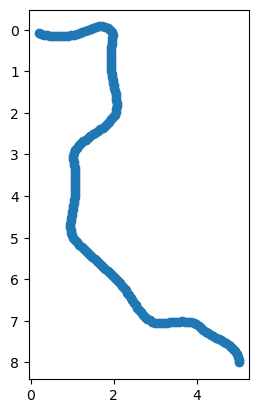

In [172]:
import matplotlib.pyplot as plt
import numpy as np
plt.gca().invert_yaxis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.scatter(control_x,control_y)
plt.show